### Fashion MNIST

In [1]:
import tensorflow as tf

#OBS: Utilize o Keras pelo tf em vez de Keras
# diretamente, recomendação do próŕio keras

#import keras

In [2]:
#importando a base de dados do Keras

fashion_mnist = tf.keras.datasets.fashion_mnist


In [3]:
(train_images, train_labels),(test_images,test_labels) = fashion_mnist.load_data()

In [4]:
train_images.shape, train_labels.shape
#60000 imagens com classificações de 0 até 9
# 28x28 pixels

((60000, 28, 28), (60000,))

In [39]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

#### Classificações

0	Camisetas/Top (T-shirt/top)

1	Calça (Trouser)

2	Suéter (Pullover)

3	Vestidos (Dress)

4	Casaco (Coat)

5	Sandálias (Sandal)

6	Camisas (Shirt)

7	Tênis (Sneaker)

8	Bolsa (Bag)

9	Botas (Ankle boot)

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### Pré-Processamento de dados

In [6]:
import matplotlib.pyplot as plt
import numpy as np

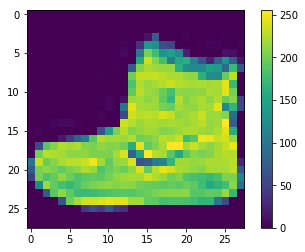

In [7]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Veja que a imagem contém 28x28 pixels (posições x (coluna) e y (linhas)), cada "ponto" deste no gráfico é atribuido um valor de 0 até 255 que representa a cor RGB.

Por exemplo: se olhar no gráfico, a posição x = 15 e y = 20, veremos mais ou menos o centro da bota, que tem um valor próximo de 200.

In [8]:
i = 0#imagem 1
x = 15#colunas
y = 20#linha

#OBS: Nas imagens, sempre Linhas em primeiro
# e colunas depois...(imagens, linha, coluna)

train_images[i][y][x]

195

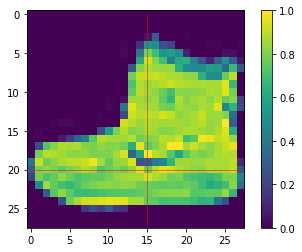

In [20]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

#Veja o ponto que nos referiamos anteriormente,
#valor próximo de 200
axisx = np.arange(0,28)
plt.plot(axisx,[y]*len(axisx),'-r',linewidth=0.5)
plt.plot([x]*len(axisx),axisx,'-r',linewidth=0.5)



plt.show()

Para melhorar o desempenho, colocar os valores que estão de 0 a 255 entre 0 e 1.

In [10]:
train_images = train_images / 255.0
test_images = test_images / 255.0 

In [16]:
train_images[i][y][x]#train_images[0][20][15] 

# que é igual a 195.0/255.0 = 0.76...

#Veja que a divisão deu certo.

0.7647058823529411

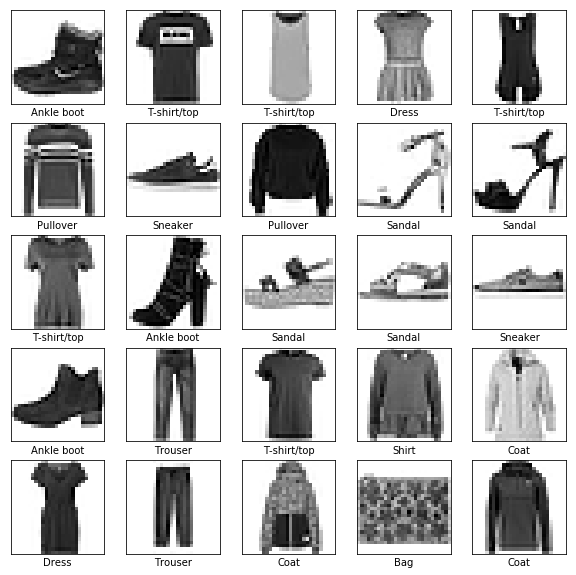

In [21]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### Construindo o Modelo

In [25]:
model = tf.keras.Sequential()


#Transforma em um vetor
model.add(
    tf.keras.layers.Flatten(
        input_shape=(28,28)
    )
)

#Camada Entrada
model.add(
    tf.keras.layers.Dense(
        units = 128,
        activation='relu',
    )
)

#Camada Saída - Saida das 10 classificaçoes possíveis
model.add(
    tf.keras.layers.Dense(
        units = 10,
        activation = 'softmax'
    )
)

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


##### Compile o modelo

Antes do modelo estar pronto para o treinamento, é necessário algumas configurações a mais. Essas serão adicionadas no passo de compilação:

- Função Loss —Essa mede quão precisa o modelo é durante o treinamento. Queremos minimizar a função para guiar o modelo para direção certa.


- Optimizer —Isso é como o modelo se atualiza com base no dado que ele vê e sua função loss.


- Métricas —usadas para monitorar os passos de treinamento e teste. O exemplo abaixo usa a acurácia, a fração das imagens que foram classificadas corretamente.

In [26]:
model.compile(
    optimizer= 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy'],
)

In [36]:
model.fit(
    train_images,
    train_labels,
    epochs=20,
    validation_split=0.05,
    
)

Train on 57000 samples, validate on 3000 samples
Epoch 1/20
57000/57000 [==============================] - 5s 86us/sample - loss: 0.0400 - accuracy: 0.9856 - val_loss: 0.4520 - val_accuracy: 0.9143
Epoch 2/20
57000/57000 [==============================] - 5s 90us/sample - loss: 0.0387 - accuracy: 0.9857 - val_loss: 0.4747 - val_accuracy: 0.9137
Epoch 3/20
57000/57000 [==============================] - 5s 90us/sample - loss: 0.0385 - accuracy: 0.9854 - val_loss: 0.4845 - val_accuracy: 0.9113
Epoch 4/20
57000/57000 [==============================] - 5s 88us/sample - loss: 0.0381 - accuracy: 0.9864 - val_loss: 0.4865 - val_accuracy: 0.9107
Epoch 5/20
57000/57000 [==============================] - 5s 83us/sample - loss: 0.0385 - accuracy: 0.9860 - val_loss: 0.4751 - val_accuracy: 0.9127
Epoch 6/20
57000/57000 [==============================] - 5s 86us/sample - loss: 0.0368 - accuracy: 0.9869 - val_loss: 0.4790 - val_accuracy: 0.9110
Epoch 7/20
57000/57000 [==============================] -

#### Testar os acertos

In [37]:
#Testar o erro e acerto do modelo com os valores reservados para Test
model.evaluate(test_images,test_labels,verbose = 2)

10000/10000 - 0s - loss: 1.0476 - accuracy: 0.8850


[1.047592655782029, 0.885]

In [38]:
test_loss, test_acc = model.evaluate(test_images,test_labels,verbose = 2)
print('Test accuracy: ', test_acc)

10000/10000 - 0s - loss: 1.0476 - accuracy: 0.8850
Test accuracy:  0.885


Perceba que o modelo se adaptou muito aos dados de Treinamento(6000), o que resulta em uma porcentagem de acerto de 98%. Contudo, os dados de teste (1000) são outros, e ele chegou no máximo em 88,5%

#### Predições 

In [40]:
predictions = model.predict(test_images)

In [45]:
# Cada predição contém um array de 10 números
len(predictions[0])

10

In [47]:
predictions[0]
# Cada um dos artigos de roupa apresentam uma
# % correspondente a uma classe

array([1.1510383e-35, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 2.8527477e-15, 4.3788459e-27, 7.5049758e-18,
       8.7813043e-33, 1.0000000e+00], dtype=float32)

In [48]:
np.argmax(predictions[0])
# Veja que ele classificou o primeiro elemento
# como 9 = Botas (Ankle boot)

9

In [50]:
# Vamos confirmar...
test_labels[0]

# Ele acertou!

9

#### Mostrar Graficamente

In [51]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [53]:
def plot(i):
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(1,2,2)
    plot_value_array(i, predictions,  test_labels)
    plt.show()

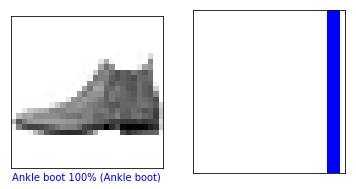

In [54]:
plot(0)

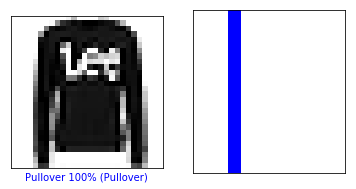

In [55]:
plot(1)

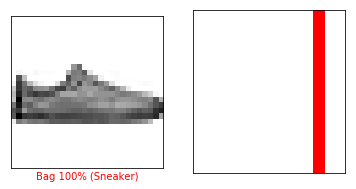

In [63]:
plot(12)

Vamos plotar algumas da previsão do modelo. Labels preditas corretamente são azuis e as predições erradas são vermelhas. O número dá a porcentagem (de 100) das labels preditas. Note que o modelo pode errar mesmo estão confiante

<Figure size 864x720 with 0 Axes>

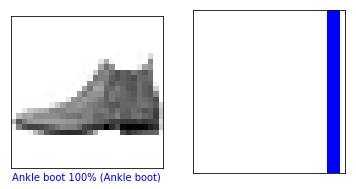

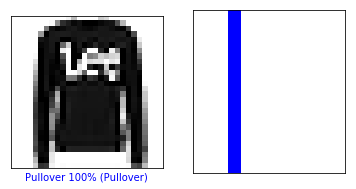

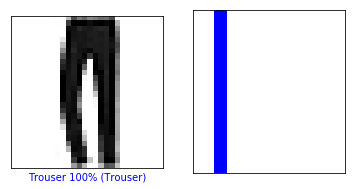

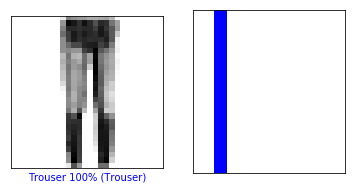

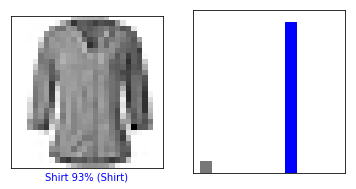

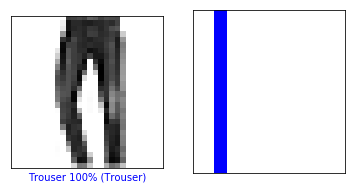

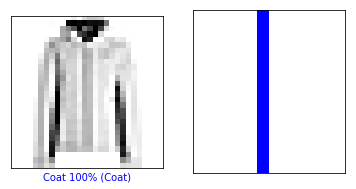

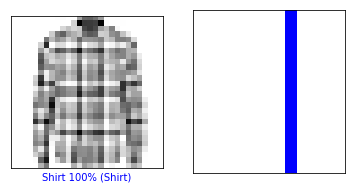

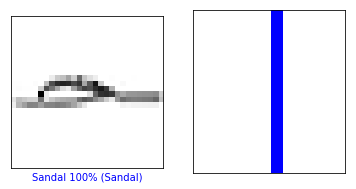

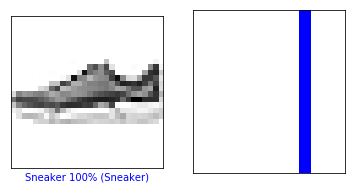

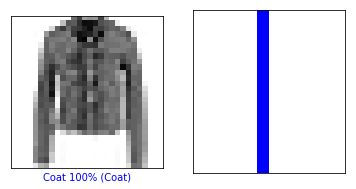

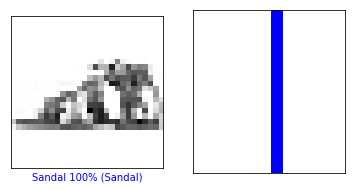

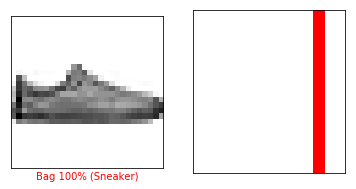

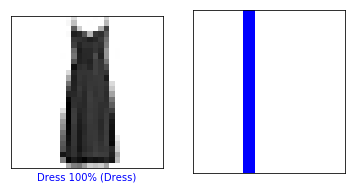

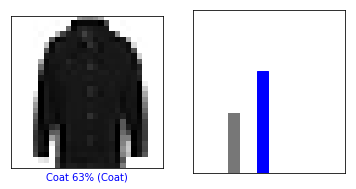

In [65]:
# Plota o primeiro X test images, e as labels preditas, e as labels verdadeiras.
# Colore as predições corretas de azul e as incorretas de vermelho.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plot(i)